<a href="https://colab.research.google.com/github/bibekuchiha/Hypothesis-Testing/blob/master/Sample%20Size%20Determination/Sample_Size_Determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEARN SAMPLE SIZE DETERMINATION WITH SCIPY
#Introduction to Sample Size and A/B Testing
One of the first steps to designing a successful experiment is determining the number of samples that you need in order to have confidence in the results. We don’t want to go through the trouble of running an A/B test or administering a survey only to discover that we don’t have enough information to make a good decision.

For instance, if we asked 5 people who they were voting for in an election, that small sample size would not be sufficient to predict the election results.

In this lesson we’ll cover two common types of experiment and their methods of sample size determination:

* A/B Tests
* Surveys

Online sample size calculators are available for both of these scenarios. These calculators will require quantities like “baseline conversion rate” or “population size”, but it’s not always obvious what these should be for a specific experiment. We’ll be covering that and more in this lesson.

#A/B Testing: Using a Calculator
An A/B Test is a scientific method of choosing between two options (Option A and Option B). Some examples of A/B tests would include:

What number of sale items on a website makes customers most likely to purchase something: 25 or 50?
What color button are customers more likely to click on: blue or green?
In order to determine the sample size necessary for an A/B test, a sample size calculator requires three numbers:

* The Baseline conversion rate
* The Minimum detectable effect
* The Statistical significance

#A/B Testing: Understanding the Baseline
A/B tests compare an option that we’re currently using to a new option that we suspect might be better. In order to compare the two options, we need a metric. Generally, our metric will be the percent of users who take a certain action after interacting with one of our options. For instance:

* The percent of customers who buy a t-shirt after visiting one of two versions of a website
* The percent of users who click on one of two versions of an ad
* The percent of readers who open an email with one of two subject lines

In order to calculate the sample size for our A/B test, we need to know whether we expect our metric to be low or high. It will take more samples to be able to spot a difference when our metric is extremely low or extremely high. Our initial estimate of our metric is called a baseline.

We can usually calculate a baseline by looking at historical data for the option that we’re currently using.

**Task**

Viral Villanelle is an American internet media company specializing in social news and digital media. Here we looked at how many people visited the website within a ten minute window and how many engaged in our top headline this week: Seventeen Gross Facts About Your Elbows, Number Three Will Astound You. We’ve calculated the quantity of each, saving the values in number_of_site_visitors and number_of_converted_visitors, but would like to know what our conversion rate is.

* The conversion rate is the number of converted visitors divided by the total number of visitors.

In [2]:
# Find the size of both of these lists
number_of_site_visitors = 2000.0
number_of_converted_visitors = 1300.0

# Calculate the conversion rate in terms of the above two variables here
conversion_rate = number_of_converted_visitors/number_of_site_visitors
print(conversion_rate)

0.65


#A/B Testing: Determining Lift
We’re running an A/B Test in order to know if Option B is better than Option A but if Option B were only a tiny percent better, would we really care? In order to detect precise differences, we need a very large sample size. In order to choose a sample size, we need to know the smallest difference that we actually care to measure. This “smallest difference” is called lift.

Lift is generally expressed as a percent of the baseline conversion rate. Suppose that 6% of our customers currently buy socks on our website Sock Hops (that’s our baseline conversion rate). We think that a new website layout would increase this. Changing a website layout is hard, so we only think that it’s worth doing if at least 8% of our customers would buy socks on Sock Hops with the new layout. That means that we want to increase our conversions by 2%. To calculate lift:


```
100 * (new - old) / old
100 * (8 - 6) / 6
33%
```
Sock Hops’ desired lift is 33%.

From 8%, calculate what lift you would need to get to 12%. Save that number into a variable called lift_eight_percent_to_twelve_percent.

In [5]:
# 100 * (Final - Initial) / Initial
lift_eight_percent_to_twelve_percent = 100 * (12-8)/8
print(lift_eight_percent_to_twelve_percent)

50.0


From 10%, calculate what a 50% increase would be. Save that number into a variable called ten_percent_up_fifty_percent.

In [7]:
# Initial + Initial * Percent Increase
ten_percent_up_fifty_percent = (10) + (10 * 0.50)
print(ten_percent_up_fifty_percent)

15.0


#A/B Testing: Don't Interfere With Your Tests
Brian the Product Manager has been running an A/B Test for a redesign of Viral Villanelle’s landing page. Brian used the principles in the Sample Size Determination course on Codecademy to calculate a sample size. He needs 1,100 users to view each variant of the landing page in order to be able to detect his desired lift. When he reaches a total of 2,200 visits to both variants, he runs a Chi-Square test. The new website design performs slightly better, but the results are not statistically significant. Brian decides to run the test for another week to see if he can get to significance. He really wants to launch the redesigned website and he needs statistical validation to show to his boss.

Brian has made a big mistake! By choosing to extend the A/B test past the sample size he needs, he introduces personal bias to the results of the test.

If the results had already been significant, he wouldn’t have run the test any longer. If he continues this pattern of preferentially extending the test when he wants a different answer, he will be more likely to get the results he wants, regardless if these desired results reflect reality.

It’s sad, but Brian will need to accept that the redesigned website isn’t significantly better than the original website.

Here are two important rules for making sure that A/B tests remain unbiased:

* Don’t continue to run the test after the predetermined sample size, until “significant” results are found.
* Don’t stop a test before reaching the predetermined sample size, just because your results reach significance early (unless there are ethical reasons that require you to stop, like a prescription drug trial).

Test data is sensitive to changes in sample size, which is why it is important to calculate beforehand.



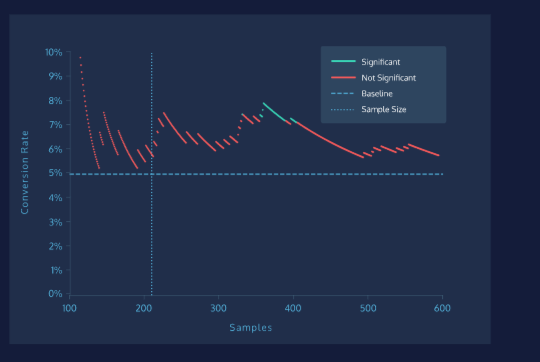

Inspect the graph in the workspace. It shows an A/B Test where the baseline was 5%, and we want to see a lift of 50% (i.e., we want our second option to have at least a 7.5% conversion rate). A sample size calculator tells us that we need 210 samples. The chart shows the cumulative conversion rate after each new sample. When we reach our desired 210 samples, our cumulative conversion rate is slightly higher than 5%, but the difference is not significantly different (indicated by red). By extending the experiment to 320 samples, the difference becomes significantly different (indicated by green). We might conclude that our results are significant if we stopped the experiment at this point. However, we can see this is a temporary fluctuation. After this brief moment of “significance” the conversion rate decreases and our results become insignificant again. By arbitrarily extending the study until it reaches significance, we fool ourselves!

#A/B Testing: Splitting a Test
Viral Villanelle’s social media presence drives visits to its website. Product Manager Brian wants to test a new ad. Using a sample size calculator, he finds that he will need a sample size of 1,100. Viral Villanelle’s current advertisement is shown to 500 users per day. What’s the best way for Brian to get his desired sample size?

It’s important to remember that Brian will need to show both the old and the new ad to 1,100 users each. If Brian wants to complete this test as quickly as possible, he could randomly divide users into two groups: half of users would see the old ad and half would see the new ad. It would take a little more than 4 days for 2,200 users to see one of the two ads.

What if Brian doesn’t want to divide Viral Villanelle’s audience evenly? If Brian is running many different types of A/B tests, he might not want to expose users to a barrage of different tests. Maybe only 10% of users should be shown the new ad, in case it performs terribly. By doing this, he would only be getting 50 users per day towards the 1,100 users that need to see the new ad. In this case, he would need to wait for 22 days (1100 / 50 = 22) in order to get his results, even though he would have gotten the 1,100 views for the old ad 3 days into the experiment.

For his final analysis, Brian should use all of the data from the 22 days. The Chi-Square test will correctly take into account that there is more data from the original ad than from the new ad.



Here at the Viral Villanelle, we found an amazing video of a hamster that appears to be rapping along to a chart-topping hip-hop song from 1979. We’ve been running it under the headline This Hamster Gets On The Microphone And What Happens Next Will Amaze You. This is reliably seen by 350 users daily. We are curious to see if our new headline Hamster’s Delight: Watch This Fuzzy Friend’s Rhythm To The Boogie (The Beat) will perform much better.

There are concerns that this new headline will alienate the jaded millennial generation so we would like to hedge our bets in case our new version performs poorly. If we only show 20% of our users the new headline, how many days will it take for us to get a sample size of at least 910 for each headline? Save your results in the variable called hamster_headline_experiment_length.

In [8]:
#20% of 350 = 70
#910 / 70 = 13
hamster_headline_experiment_length = 13


#Sample Size Calculator for Margin of Error
Let’s imagine that we own a juice bar called BeetsMe in the small town of Vancucumber. We want to know what our customers’ favorite vegetable is so that we know what to base our next juice recipe around. How many people do we need to survey to be confident in our results?

It is easy to find a sample size calculator online, but it is difficult to determine what parameters to input. Generally, sample size calculators use 4 parameters:

* Margin of error
* Confidence level
* Population size
* Expected proportion

We have provided an example of a sample size calculator for you in the browser to the right. In the next 4 exercises, we will explain what these parameters mean and how we can choose them to accurately represent our experiment

https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/margin_of_error/index.html

#Margin of Error
What does it mean to have “enough” people for a survey? Generally, we are making sure that our results are within a margin of error of the correct answer.

The margin of error is the furthest we expect the true value to be from what we measure in our survey. For example, let’s say we choose a margin of error of 4%. If we get results showing 40% of people love beets the most, we can be confident that the true proportion in the population lies somewhere between 36% and 44%. Thus, the smaller we make the margin of error, the more certainty we have in the results. The larger we make the margin of error, more uncertain we are that they represent the views of the total population.

In order to make our margin of error smaller, we will need a larger sample size.

#Population Size
Our sample should accurately represent the population as a whole. So, when we are dealing with a larger population, we should probably be sampling more people.

It is sometimes tricky to determine what the effective population size is. For example, suppose there are 200 people who currently visit BeetsMe regularly. Is 200 the population size for our vegetable survey?

If BeetsMe wants to appeal to the tourists that frequently visit Vancucumber, or if they ever want to launch an online store to ship healthy treats all over the world, the real population size is closer to 8 billion (or infinity, really, if we think about the number of humans who could eventually exist and have vegetable preferences). So, for experiments like this, we use the highest population size we can. Normally, 100,000 will suffice, as changes become negligible beyond that.

Often, for decisions that require extrapolation to an unknown customer base, it is important to understand the preferences of a typical person out in the world, whether or not they are part of your customer base right now. Generally, we use this larger population size of 100,000 or greater instead of focusing on the amount of current customers.

However, if the small town of Vancucumber is holding an election for a new mayor, and we want to project the results of the election, then the 1700 citizens would be the only important people. In this case, 1700 is the population size we would use in a sample size calculator.

1.
You have a subscription service called Flow-etry, which sends customers a recording of a random poem being read rhythmically over a random beat once per day. There have been 100 cancellations in the past month, and 96 of them have answered a cancellation survey.

If you are conducting a survey about reasons for cancellation, what is a good choice for population size? Store your answer in a variable called flow_population.

In [9]:
flow_population = 100000


2.
You are doing a company-wide survey to determine what the team-bonding outing should be for this quarter. The options are laser tag, bowling, and karaoke. The company has 643 employees.

What is the population size for this survey? Store your answer in a variable called outing_pop.

In [10]:
outing_pop = 643

#Likely Sample Proportion
Often, before we conduct a survey, we have a guess of what we expect the results to be. This guess could be based upon the results from a previous survey, or perhaps the results of a small pilot study before the real study.

As the expected proportion of people with the desired trait decreases, we can survey fewer people. For example, if we are projecting election results and Candidate C has 1% of the voter base, taking a small sample of only 5 people might be fine, because it is very likely that no one we have chosen is voting for Candidate C. This is close enough to the true proportion.

As the expected proportion increases, it is rarer that we hit that proportion accurately with the random sample we choose.

If we do not have historical data, we normally use 50%, which gives the most conservative (i.e., largest required) sample size.

#Confidence Level
We also need to choose a confidence level. The confidence level is the probability that the margin of error contains the true proportion. For example, if we choose a confidence level of 99%, we can expect that after multiple repetitions of the survey, the true value will lie within our specified range 99% of the time. As we increase the confidence level, we must have a larger sample size.

We normally use a confidence level of 95%.

#Sample Size of a Survey
Once we determine appropriate values for the margin of error, confidence level, population size, and expected proportion values for our experiment, we can use a sample size calculator to determine the minimum sample size we need to survey to get the desired confidence in our answer.

Let’s put together what we’ve learned so far and determine the appropriate sample size for BeetsMe’s vegetable survey.

#Differing Survey Results
Suppose we are going to survey a group of high school students to see what programming language they want to learn. In the survey, we give the students two choices: JavaScript or Python. This seems like a problem where we would use a Sample Size Survey Calculator.

But what if we don’t care about getting a specific margin of error? What if instead, we want to make a comparison: Are girls more likely to want to learn Python than boys are?

This survey is more similar to an A/B Test. Our baseline is the approximate percent of the population who want to learn Python, and our lift is the minimum difference between boys and girls that we want to be able to detect.

Whenever we want to make comparisons between subpopulations in our survey, we must use the A/B Test Calculator in order to get our desired survey size.